# Week 1

# Introduction

I will be using the Foursquare data to clusterize different neighborhoods in my city, Santiago de Chile. This clusterization could be useful for many purposes, but I will focus my analysis on its real estate implications, hopefully getting an answer to the following question: if a new real estate appears to market, which would be a good description of its neighborhood and which type of people would be interested in renting a property there?.

The features feeding my algorithm will be the relative abundance of the different type of venues cataloged by the Foursquare API.

The potential stake-holders for my analysis could be real estate agents looking for a high-level quantitative look of the neighborhoods they have in their portfolio. It could also serve people looking to rent in Santiago who want a general notion of the types of neighborhoods in the city, which can be useful to narrow and optimize their search.

# Data

Foursquare provides data about the venues around a specific gps coordinate, as well as reviews and other features. I will combine said data with a catalog containing the coordinates of the main neighborhoods in Santiago, extracted from google maps.

# Week 2

# Methodology

The coordinates of the neighborhoods was obtained from this custom [google map](https://maps.google.com/maps/ms?ie=UTF8&oe=UTF8&msa=0&msid=201859164663359875721.00046955cd791cb37cca3). Its noteworthy that the coordinates aren't readily available, and they had to be extracted via [RegEx](https://docs.python.org/3/library/re.html) from the soruce code.

In the folowing code, the variable 'barrio' contatins the sourcecode from the aforementioned map. 'm3'

In [2]:
import re
import pandas as pd

min_num_venues = 15

In [3]:
testx = '[[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.445771,-70.665988]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.445771,-70.665988]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000001\"]\n,[[\"Barrio Concha y Toro\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.40614,-70.577346]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.40614,-70.577346]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000002\"]\n,[[\"Barrio Las Flores SA\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.353821,-70.72076200000001]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.353821,-70.72076200000001]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000003\"]\n,[[\"Barrio Plaza\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.413998,-70.592179]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.413998,-70.592179]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000004\"]\n,[[\"Barrio el Golf\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.418153,-70.616013]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.418153,-70.616013]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000005\"]\n,[[\"Barrio Pedro de Valdivia Norte\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.468341,-70.555551]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.468341,-70.555551]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000006\"]\n,[[\"Barrio La Faena\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.444638,-70.648227]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.444638,-70.648227]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000007\"]\n,[[\"Barrio Londres\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.439105,-70.641167]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.439105,-70.641167]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000008\"]\n,[[\"Barrio Lastarria - Santiago\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.478918,-70.605525]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.478918,-70.605525]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5973000009\"]\n,[[\"Barrio Brasil\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.440502,-70.639246]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.440502,-70.639246]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597300000A\"]\n,[[\"Barrio San Borja\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.449145,-70.643158]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.449145,-70.643158]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597300000B\"]\n,[[\"Barrio San Isidro\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.445157,-70.653334]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.445157,-70.653334]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597300000C\"]\n,[[\"Barrio Cívico\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.474873,-70.642046]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.474873,-70.642046]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597300000D\"]\n,[[\"Barrio Franklin (Santiago)\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.475375,-70.651102]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.475375,-70.651102]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597300000E\"]\n,[[\"Barrio Huemul 1\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.370536,-70.722772]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.370536,-70.722772]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597300000F\"]\n,[[\"Barrio La Pradera\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.421697,-70.565435]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.421697,-70.565435]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000010\"]\n,[[\"Barrio Los Descubridores\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.426966,-70.58302700000002]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.426966,-70.58302700000002]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000011\"]\n,[[\"Barrio Vaticano\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.414274,-70.570511]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.414274,-70.570511]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000012\"]\n,[[\"Barrio La Capitanía\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.403922,-70.564959]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.403922,-70.564959]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000013\"]\n,[[\"Barrio Escandinavia\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.454843,-70.542591]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.454843,-70.542591]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000014\"]\n,[[\"Barrio Industrial La Reina\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.42697,-70.619936]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.42697,-70.619936]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000015\"]\n,[[\"Barrio Tajamar\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.417037,-70.578357]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.417037,-70.578357]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000016\"]\n,[[\"Barrio San Pascual\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.429431,-70.606628]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.429431,-70.606628]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000017\"]\n,[[\"Barrio Lyon\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.43015400000001,-70.614083]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.43015400000001,-70.614083]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000018\"]\n,[[\"Barrio Divina Providencia\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.41186,-70.54484]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.41186,-70.54484]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5974000019\"]\n,[[\"Barrio Los Domínicos\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.389043,-70.534304]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.389043,-70.534304]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597400001A\"]\n,[[\"Barrio Estoril\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.466876,-70.562357]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.466876,-70.562357]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597400001B\"]\n,[[\"Barrio Ictinos\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.454333,-70.635543]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.454333,-70.635543]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597400001C\"]\n,[[\"Barrio Madrid\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.427833,-70.643666]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.427833,-70.643666]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597400001D\"]\n,[[\"Barrio Patronato\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.470505,-70.631265]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.470505,-70.631265]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597400001E\"]\n,[[\"Barrio Sierra Bella\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.477905,-70.62578600000002]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.477905,-70.62578600000002]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597400001F\"]\n,[[\"Barrio Santa Elena\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.503346,-70.64648]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.503346,-70.64648]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000020\"]\n,[[\"Barrio Llico\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.431967,-70.671736]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.431967,-70.671736]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000021\"]\n,[[\"Barrio Balmaceda\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.502098,-70.621228]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.502098,-70.621228]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000022\"]\n,[[\"Barrio Canadá\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.477801,-70.660543]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.477801,-70.660543]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000023\"]\n,[[\"Barrio Traslaviña\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.507577000000005,-70.662635]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.507577000000005,-70.662635]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000024\"]\n,[[\"Barrio Atacama\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.406821,-70.672235]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.406821,-70.672235]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000025\"]\n,[[\"Barrio Villa Moderna\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.490798,-70.645454]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.490798,-70.645454]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000026\"]\n,[[\"Barrio San Miguel\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.464285,-70.684444]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.464285,-70.684444]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000027\"]\n,[[\"Barrio Chuchunco\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.440642000000004,-70.729113]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.440642000000004,-70.729113]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000028\"]\n,[[\"Barrio Jardín de Lo Prado\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.524761,-70.653973]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.524761,-70.653973]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000029\"]\n,[[\"Barrio Los Arcos\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.44027,-70.714374]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.44027,-70.714374]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597500002A\"]\n,[[\"Barrio Blanqueado\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.529512,-70.670958]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.529512,-70.670958]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597500002B\"]\n,[[\"Barrio Nueva España\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.543489,-70.625413]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.543489,-70.625413]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597500002C\"]\n,[[\"Barrio La Granja\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.433461,-70.725805]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.433461,-70.725805]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597500002D\"]\n,[[\"Barrio Perez Mascayano\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.535123,-70.646051]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.535123,-70.646051]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597500002E\"]\n,[[\"Barrio San Ramón\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.500698,-70.687517]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.500698,-70.687517]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597500002F\"]\n,[[\"Barrio Fraternal Ferroviaria\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.432932,-70.735706]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.432932,-70.735706]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000030\"]\n,[[\"Barrio Washington\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.564085,-70.547034]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.564085,-70.547034]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000031\"]\n,[[\"Barrio Ciudad del Este\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.448339,-70.718216]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.448339,-70.718216]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000032\"]\n,[[\"Barrio Territorio Antártico\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.488033,-70.738264]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.488033,-70.738264]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000033\"]\n,[[\"Barrio Las Golondrinas\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.384717,-70.723221]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.384717,-70.723221]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5975000034\"]\n,[[\"Barrio Valle Lo Campino\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.546491,-70.66161900000002]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.546491,-70.66161900000002]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000035\"]\n,[[\"Barrio Venecia\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.46938,-70.741283]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.46938,-70.741283]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000036\"]\n,[[\"Barrio Lo Ortuzar\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.585801,-70.57480100000001]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.585801,-70.57480100000001]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000037\"]\n,[[\"Barrio Granja Antigua\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.557567,-70.673678]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.557567,-70.673678]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000038\"]\n,[[\"Barrio Lo Espina\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.509157,-70.727602]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.509157,-70.727602]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000039\"]\n,[[\"Barrio Zaror\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.571935,-70.680597]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.571935,-70.680597]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597600003A\"]\n,[[\"Barrio Los Carolinos\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.563605,-70.66417600000001]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.563605,-70.66417600000001]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597600003B\"]\n,[[\"Barrio Los Sauces\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.595278,-70.693356]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.595278,-70.693356]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597600003C\"]\n,[[\"Barrio Arnet\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.593295,-70.704994]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.593295,-70.704994]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597600003D\"]\n,[[\"Barrio San Bernardo\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.569377,-70.718617]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.569377,-70.718617]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597600003E\"]\n,[[\"Barrio Tejas de Chena\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.598608,-70.701603]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.598608,-70.701603]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597600003F\"]\n,[[\"Barrio Esmeralda\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.604951,-70.7021]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.604951,-70.7021]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000040\"]\n,[[\"Barrio Guarello\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.639954,-70.709724]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.639954,-70.709724]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000041\"]\n,[[\"Barrio Nos\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.37703,-70.642209]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.37703,-70.642209]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000042\"]\n,[[\"Barrio Aguirre Luco\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.455209,-70.616974]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.455209,-70.616974]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000043\"]\n,[[\"Barrio Elías de la Cruz\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.536287,-70.583041]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.536287,-70.583041]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000044\"]\n,[[\"Barrio Antigua Florida\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.367545,-70.557132]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.367545,-70.557132]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000045\"]\n,[[\"Barrio Lo Curro\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.4524,-70.666925]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.4524,-70.666925]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000046\"]\n,[[\"Barrio República\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.451393,-70.677177]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.451393,-70.677177]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000047\"]\n,[[\"Barrio Meiggs\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.353868,-70.681293]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.353868,-70.681293]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5976000048\"]\n,[[\"Barrio del Pilar\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.360239,-70.746267]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.360239,-70.746267]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000049\"]\n,[[\"Gran Barrio Tres Montes\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.495812,-70.779333]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.495812,-70.779333]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597700004A\"]\n,[[\"Barrio Santa Maria de Maipu\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.383003,-70.525211]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.383003,-70.525211]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597700004B\"]\n,[[\"Barrio San Damián\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.626001,-70.687403]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.626001,-70.687403]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597700004C\"]\n,[[\"Barrio Las Dalias de Nos\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.496473,-70.588899]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.496473,-70.588899]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597700004D\"]\n,[[\"Barrio Chacarillas\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.459388,-70.677142]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.459388,-70.677142]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597700004E\"]\n,[[\"Barrio Exposición\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.595758,-70.585775]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.595758,-70.585775]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597700004F\"]\n,[[\"Barrio Ciudad del Sol\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.48488,-70.769554]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.48488,-70.769554]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000050\"]\n,[[\"Barrio Los Rosales\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.486257,-70.765028]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.486257,-70.765028]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000051\"]\n,[[\"Barrio la reforma\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.415403,-70.602338]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.415403,-70.602338]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000052\"]\n,[[\"Barrio El Bosque\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.420265,-70.608574]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.420265,-70.608574]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000053\"]\n,[[\"Barrio Suecia\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.441782,-70.614934]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.441782,-70.614934]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000054\"]\n,[[\"Barrio Manuel Montt\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.444396,-70.626093]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.444396,-70.626093]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000055\"]\n,[[\"Barrio Italia - Condell\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.432258,-70.635953]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.432258,-70.635953]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000056\"]\n,[[\"Barrio Bellavista\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.388757,-70.670779]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.388757,-70.670779]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5977000057\"]\n,[[\"Barrio La Palmilla\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.431442,-70.488281]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.431442,-70.488281]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5978000058\"]\n,[[\"Barrio de Santa Isabel\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.406955,-70.555842]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.406955,-70.555842]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA5978000059\"]\n,[[\"Barrio Apoquindo\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.456365,-70.649686]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.456365,-70.649686]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597800005A\"]\n,[[\"Barrio San Diego\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.444637,-70.648224]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.444637,-70.648224]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597800005B\"]\n,[[\"Barrio París-Londres\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.440736,-70.676489]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.440736,-70.676489]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597800005C\"]\n,[[\"Barrio Yungay\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.453321,-70.678267]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.453321,-70.678267]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597800005D\"]\n,[[\"Barrio Estacion\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.552089,-70.552912]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.552089,-70.552912]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597800005E\"]\n,[[\"Barrio Las Perdices, Enaco\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\"]\n,[]\n,1,1,[[null,[-33.39865600000001,-70.758374]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.39865600000001,-70.758374]\n,[0,-32]\n,\"KZ4O4RC3M3R80669CA597800005F\"]\n,[[\"Barrio La Glorieta\"]\n]\n,[]\n]\n,[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/1492-wht-polygon-blank.png\\u0026filter\\u003dff0000FF\"]\n,[]\n,1,1,[[[-70.68088,-33.42569000000001,-70.623293,-33.477344]\n]\n,\"0\",null,\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",[-33.45304609411398,-70.6545311300603]\n,[0,0]\n,\"KZ4O4RC3M3R80669CA5978000060\"]\n,[[\"Comuna Stgo\"]\n]\n,[]\n]\n]\n,null,null,true,null,null,null,null,[[\"zhmzQkbGP-nc.kZ4O4rC3m3R8\",1,null,null,null,\"https://www.google.com/maps/d/kml?mid\\u003d1ACWDQ2UW_t_jLBHcV49D4CuIWLE\\u0026lid\\u003dzhmzQkbGP-nc.kZ4O4rC3m3R8\",null,null,null,null,null,2,null,[[[\"KZ4O4RC3M3R80669CA5973000001\",[[[-33.445771,-70.665988]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Concha y Toro\"]\n,1]\n,null,[]\n,[]\n]\n,null,0]\n,[\"KZ4O4RC3M3R80669CA5973000002\",[[[-33.40614,-70.577346]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Las Flores SA\"]\n,1]\n,null,[]\n,[]\n]\n,null,1]\n,[\"KZ4O4RC3M3R80669CA5973000003\",[[[-33.353821,-70.72076200000001]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Plaza\"]\n,1]\n,null,[]\n,[]\n,[null,\"ChIJ9QdssMvAYpYRuOV3ChXCIgs\",true]\n]\n,null,2]\n,[\"KZ4O4RC3M3R80669CA5973000004\",[[[-33.413998,-70.592179]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio el Golf\"]\n,1]\n,null,[]\n,[]\n]\n,null,3]\n,[\"KZ4O4RC3M3R80669CA5973000005\",[[[-33.418153,-70.616013]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Pedro de Valdivia Norte\"]\n,1]\n,null,[]\n,[]\n]\n,null,4]\n,[\"KZ4O4RC3M3R80669CA5973000006\",[[[-33.468341,-70.555551]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio La Faena\"]\n,1]\n,null,[]\n,[]\n]\n,null,5]\n,[\"KZ4O4RC3M3R80669CA5973000007\",[[[-33.444638,-70.648227]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Londres\"]\n,1]\n,null,[]\n,[]\n]\n,null,6]\n,[\"KZ4O4RC3M3R80669CA5973000008\",[[[-33.439105,-70.641167]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Lastarria - Santiago\"]\n,1]\n,null,[]\n,[]\n]\n,null,7]\n,[\"KZ4O4RC3M3R80669CA5973000009\",[[[-33.478918,-70.605525]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Brasil\"]\n,1]\n,null,[]\n,[]\n]\n,null,8]\n,[\"KZ4O4RC3M3R80669CA597300000A\",[[[-33.440502,-70.639246]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio San Borja\"]\n,1]\n,null,[]\n,[]\n]\n,null,9]\n,[\"KZ4O4RC3M3R80669CA597300000B\",[[[-33.449145,-70.643158]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio San Isidro\"]\n,1]\n,null,[]\n,[]\n]\n,null,10]\n,[\"KZ4O4RC3M3R80669CA597300000C\",[[[-33.445157,-70.653334]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Cívico\"]\n,1]\n,null,[]\n,[]\n]\n,null,11]\n,[\"KZ4O4RC3M3R80669CA597300000D\",[[[-33.474873,-70.642046]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Franklin (Santiago)\"]\n,1]\n,null,[]\n,[]\n]\n,null,12]\n,[\"KZ4O4RC3M3R80669CA597300000E\",[[[-33.475375,-70.651102]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Huemul 1\"]\n,1]\n,null,[]\n,[]\n]\n,null,13]\n,[\"KZ4O4RC3M3R80669CA597300000F\",[[[-33.370536,-70.722772]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio La Pradera\"]\n,1]\n,null,[]\n,[]\n]\n,null,14]\n,[\"KZ4O4RC3M3R80669CA5974000010\",[[[-33.421697,-70.565435]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Los Descubridores\"]\n,1]\n,null,[]\n,[]\n]\n,null,15]\n,[\"KZ4O4RC3M3R80669CA5974000011\",[[[-33.426966,-70.58302700000002]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Vaticano\"]\n,1]\n,null,[]\n,[]\n]\n,null,16]\n,[\"KZ4O4RC3M3R80669CA5974000012\",[[[-33.414274,-70.570511]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio La Capitanía\"]\n,1]\n,null,[]\n,[]\n]\n,null,17]\n,[\"KZ4O4RC3M3R80669CA5974000013\",[[[-33.403922,-70.564959]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Escandinavia\"]\n,1]\n,null,[]\n,[]\n]\n,null,18]\n,[\"KZ4O4RC3M3R80669CA5974000014\",[[[-33.454843,-70.542591]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Industrial La Reina\"]\n,1]\n,null,[]\n,[]\n]\n,null,19]\n,[\"KZ4O4RC3M3R80669CA5974000015\",[[[-33.42697,-70.619936]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Tajamar\"]\n,1]\n,null,[]\n,[]\n]\n,null,20]\n,[\"KZ4O4RC3M3R80669CA5974000016\",[[[-33.417037,-70.578357]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio San Pascual\"]\n,1]\n,null,[]\n,[]\n]\n,null,21]\n,[\"KZ4O4RC3M3R80669CA5974000017\",[[[-33.429431,-70.606628]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Lyon\"]\n,1]\n,null,[]\n,[]\n]\n,null,22]\n,[\"KZ4O4RC3M3R80669CA5974000018\",[[[-33.43015400000001,-70.614083]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Divina Providencia\"]\n,1]\n,null,[]\n,[]\n]\n,null,23]\n,[\"KZ4O4RC3M3R80669CA5974000019\",[[[-33.41186,-70.54484]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Los Domínicos\"]\n,1]\n,null,[]\n,[]\n]\n,null,24]\n,[\"KZ4O4RC3M3R80669CA597400001A\",[[[-33.389043,-70.534304]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Estoril\"]\n,1]\n,null,[]\n,[]\n]\n,null,25]\n,[\"KZ4O4RC3M3R80669CA597400001B\",[[[-33.466876,-70.562357]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Ictinos\"]\n,1]\n,null,[]\n,[]\n]\n,null,26]\n,[\"KZ4O4RC3M3R80669CA597400001C\",[[[-33.454333,-70.635543]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Madrid\"]\n,1]\n,null,[]\n,[]\n]\n,null,27]\n,[\"KZ4O4RC3M3R80669CA597400001D\",[[[-33.427833,-70.643666]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Patronato\"]\n,1]\n,null,[]\n,[]\n]\n,null,28]\n,[\"KZ4O4RC3M3R80669CA597400001E\",[[[-33.470505,-70.631265]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Sierra Bella\"]\n,1]\n,null,[]\n,[]\n]\n,null,29]\n,[\"KZ4O4RC3M3R80669CA597400001F\",[[[-33.477905,-70.62578600000002]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Santa Elena\"]\n,1]\n,null,[]\n,[]\n]\n,null,30]\n,[\"KZ4O4RC3M3R80669CA5975000020\",[[[-33.503346,-70.64648]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Llico\"]\n,1]\n,null,[]\n,[]\n]\n,null,31]\n,[\"KZ4O4RC3M3R80669CA5975000021\",[[[-33.431967,-70.671736]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Balmaceda\"]\n,1]\n,null,[]\n,[]\n]\n,null,32]\n,[\"KZ4O4RC3M3R80669CA5975000022\",[[[-33.502098,-70.621228]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Canadá\"]\n,1]\n,null,[]\n,[]\n]\n,null,33]\n,[\"KZ4O4RC3M3R80669CA5975000023\",[[[-33.477801,-70.660543]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Traslaviña\"]\n,1]\n,null,[]\n,[]\n]\n,null,34]\n,[\"KZ4O4RC3M3R80669CA5975000024\",[[[-33.507577000000005,-70.662635]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Atacama\"]\n,1]\n,null,[]\n,[]\n]\n,null,35]\n,[\"KZ4O4RC3M3R80669CA5975000025\",[[[-33.406821,-70.672235]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Villa Moderna\"]\n,1]\n,null,[]\n,[]\n]\n,null,36]\n,[\"KZ4O4RC3M3R80669CA5975000026\",[[[-33.490798,-70.645454]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio San Miguel\"]\n,1]\n,null,[]\n,[]\n]\n,null,37]\n,[\"KZ4O4RC3M3R80669CA5975000027\",[[[-33.464285,-70.684444]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Chuchunco\"]\n,1]\n,null,[]\n,[]\n]\n,null,38]\n,[\"KZ4O4RC3M3R80669CA5975000028\",[[[-33.440642000000004,-70.729113]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Jardín de Lo Prado\"]\n,1]\n,null,[]\n,[]\n]\n,null,39]\n,[\"KZ4O4RC3M3R80669CA5975000029\",[[[-33.524761,-70.653973]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Los Arcos\"]\n,1]\n,null,[]\n,[]\n]\n,null,40]\n,[\"KZ4O4RC3M3R80669CA597500002A\",[[[-33.44027,-70.714374]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Blanqueado\"]\n,1]\n,null,[]\n,[]\n]\n,null,41]\n,[\"KZ4O4RC3M3R80669CA597500002B\",[[[-33.529512,-70.670958]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Nueva España\"]\n,1]\n,null,[]\n,[]\n]\n,null,42]\n,[\"KZ4O4RC3M3R80669CA597500002C\",[[[-33.543489,-70.625413]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio La Granja\"]\n,1]\n,null,[]\n,[]\n]\n,null,43]\n,[\"KZ4O4RC3M3R80669CA597500002D\",[[[-33.433461,-70.725805]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Perez Mascayano\"]\n,1]\n,null,[]\n,[]\n]\n,null,44]\n,[\"KZ4O4RC3M3R80669CA597500002E\",[[[-33.535123,-70.646051]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio San Ramón\"]\n,1]\n,null,[]\n,[]\n]\n,null,45]\n,[\"KZ4O4RC3M3R80669CA597500002F\",[[[-33.500698,-70.687517]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Fraternal Ferroviaria\"]\n,1]\n,null,[]\n,[]\n]\n,null,46]\n,[\"KZ4O4RC3M3R80669CA5975000030\",[[[-33.432932,-70.735706]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Washington\"]\n,1]\n,null,[]\n,[]\n]\n,null,47]\n,[\"KZ4O4RC3M3R80669CA5975000031\",[[[-33.564085,-70.547034]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Ciudad del Este\"]\n,1]\n,null,[]\n,[]\n]\n,null,48]\n,[\"KZ4O4RC3M3R80669CA5975000032\",[[[-33.448339,-70.718216]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Territorio Antártico\"]\n,1]\n,null,[]\n,[]\n]\n,null,49]\n,[\"KZ4O4RC3M3R80669CA5975000033\",[[[-33.488033,-70.738264]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Las Golondrinas\"]\n,1]\n,null,[]\n,[]\n]\n,null,50]\n,[\"KZ4O4RC3M3R80669CA5975000034\",[[[-33.384717,-70.723221]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Valle Lo Campino\"]\n,1]\n,null,[]\n,[]\n]\n,null,51]\n,[\"KZ4O4RC3M3R80669CA5976000035\",[[[-33.546491,-70.66161900000002]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Venecia\"]\n,1]\n,null,[]\n,[]\n]\n,null,52]\n,[\"KZ4O4RC3M3R80669CA5976000036\",[[[-33.46938,-70.741283]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Lo Ortuzar\"]\n,1]\n,null,[]\n,[]\n]\n,null,53]\n,[\"KZ4O4RC3M3R80669CA5976000037\",[[[-33.585801,-70.57480100000001]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Granja Antigua\"]\n,1]\n,null,[]\n,[]\n]\n,null,54]\n,[\"KZ4O4RC3M3R80669CA5976000038\",[[[-33.557567,-70.673678]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Lo Espina\"]\n,1]\n,null,[]\n,[]\n]\n,null,55]\n,[\"KZ4O4RC3M3R80669CA5976000039\",[[[-33.509157,-70.727602]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Zaror\"]\n,1]\n,null,[]\n,[]\n]\n,null,56]\n,[\"KZ4O4RC3M3R80669CA597600003A\",[[[-33.571935,-70.680597]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Los Carolinos\"]\n,1]\n,null,[]\n,[]\n]\n,null,57]\n,[\"KZ4O4RC3M3R80669CA597600003B\",[[[-33.563605,-70.66417600000001]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Los Sauces\"]\n,1]\n,null,[]\n,[]\n]\n,null,58]\n,[\"KZ4O4RC3M3R80669CA597600003C\",[[[-33.595278,-70.693356]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Arnet\"]\n,1]\n,null,[]\n,[]\n]\n,null,59]\n,[\"KZ4O4RC3M3R80669CA597600003D\",[[[-33.593295,-70.704994]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio San Bernardo\"]\n,1]\n,null,[]\n,[]\n]\n,null,60]\n,[\"KZ4O4RC3M3R80669CA597600003E\",[[[-33.569377,-70.718617]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Tejas de Chena\"]\n,1]\n,null,[]\n,[]\n]\n,null,61]\n,[\"KZ4O4RC3M3R80669CA597600003F\",[[[-33.598608,-70.701603]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Esmeralda\"]\n,1]\n,null,[]\n,[]\n]\n,null,62]\n,[\"KZ4O4RC3M3R80669CA5976000040\",[[[-33.604951,-70.7021]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Guarello\"]\n,1]\n,null,[]\n,[]\n]\n,null,63]\n,[\"KZ4O4RC3M3R80669CA5976000041\",[[[-33.639954,-70.709724]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Nos\"]\n,1]\n,null,[]\n,[]\n]\n,null,64]\n,[\"KZ4O4RC3M3R80669CA5976000042\",[[[-33.37703,-70.642209]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Aguirre Luco\"]\n,1]\n,null,[]\n,[]\n]\n,null,65]\n,[\"KZ4O4RC3M3R80669CA5976000043\",[[[-33.455209,-70.616974]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Elías de la Cruz\"]\n,1]\n,null,[]\n,[]\n]\n,null,66]\n,[\"KZ4O4RC3M3R80669CA5976000044\",[[[-33.536287,-70.583041]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Antigua Florida\"]\n,1]\n,null,[]\n,[]\n]\n,null,67]\n,[\"KZ4O4RC3M3R80669CA5976000045\",[[[-33.367545,-70.557132]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Lo Curro\"]\n,1]\n,null,[]\n,[]\n]\n,null,68]\n,[\"KZ4O4RC3M3R80669CA5976000046\",[[[-33.4524,-70.666925]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio República\"]\n,1]\n,null,[]\n,[]\n]\n,null,69]\n,[\"KZ4O4RC3M3R80669CA5976000047\",[[[-33.451393,-70.677177]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Meiggs\"]\n,1]\n,null,[]\n,[]\n]\n,null,70]\n,[\"KZ4O4RC3M3R80669CA5976000048\",[[[-33.353868,-70.681293]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio del Pilar\"]\n,1]\n,null,[]\n,[]\n]\n,null,71]\n,[\"KZ4O4RC3M3R80669CA5977000049\",[[[-33.360239,-70.746267]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Gran Barrio Tres Montes\"]\n,1]\n,null,[]\n,[]\n]\n,null,72]\n,[\"KZ4O4RC3M3R80669CA597700004A\",[[[-33.495812,-70.779333]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Santa Maria de Maipu\"]\n,1]\n,null,[]\n,[]\n]\n,null,73]\n,[\"KZ4O4RC3M3R80669CA597700004B\",[[[-33.383003,-70.525211]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio San Damián\"]\n,1]\n,null,[]\n,[]\n]\n,null,74]\n,[\"KZ4O4RC3M3R80669CA597700004C\",[[[-33.626001,-70.687403]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Las Dalias de Nos\"]\n,1]\n,null,[]\n,[]\n]\n,null,75]\n,[\"KZ4O4RC3M3R80669CA597700004D\",[[[-33.496473,-70.588899]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Chacarillas\"]\n,1]\n,null,[]\n,[]\n]\n,null,76]\n,[\"KZ4O4RC3M3R80669CA597700004E\",[[[-33.459388,-70.677142]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Exposición\"]\n,1]\n,null,[]\n,[]\n]\n,null,77]\n,[\"KZ4O4RC3M3R80669CA597700004F\",[[[-33.595758,-70.585775]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Ciudad del Sol\"]\n,1]\n,null,[]\n,[]\n]\n,null,78]\n,[\"KZ4O4RC3M3R80669CA5977000050\",[[[-33.48488,-70.769554]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Los Rosales\"]\n,1]\n,null,[]\n,[]\n]\n,null,79]\n,[\"KZ4O4RC3M3R80669CA5977000051\",[[[-33.486257,-70.765028]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio la reforma\"]\n,1]\n,null,[]\n,[]\n]\n,null,80]\n,[\"KZ4O4RC3M3R80669CA5977000052\",[[[-33.415403,-70.602338]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio El Bosque\"]\n,1]\n,null,[]\n,[]\n]\n,null,81]\n,[\"KZ4O4RC3M3R80669CA5977000053\",[[[-33.420265,-70.608574]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Suecia\"]\n,1]\n,null,[]\n,[]\n]\n,null,82]\n,[\"KZ4O4RC3M3R80669CA5977000054\",[[[-33.441782,-70.614934]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Manuel Montt\"]\n,1]\n,null,[]\n,[]\n]\n,null,83]\n,[\"KZ4O4RC3M3R80669CA5977000055\",[[[-33.444396,-70.626093]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Italia - Condell\"]\n,1]\n,null,[]\n,[]\n]\n,null,84]\n,[\"KZ4O4RC3M3R80669CA5977000056\",[[[-33.432258,-70.635953]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Bellavista\"]\n,1]\n,null,[]\n,[]\n]\n,null,85]\n,[\"KZ4O4RC3M3R80669CA5977000057\",[[[-33.388757,-70.670779]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio La Palmilla\"]\n,1]\n,null,[]\n,[]\n]\n,null,86]\n,[\"KZ4O4RC3M3R80669CA5978000058\",[[[-33.431442,-70.488281]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio de Santa Isabel\"]\n,1]\n,null,[]\n,[]\n]\n,null,87]\n,[\"KZ4O4RC3M3R80669CA5978000059\",[[[-33.406955,-70.555842]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Apoquindo\"]\n,1]\n,null,[]\n,[]\n]\n,null,88]\n,[\"KZ4O4RC3M3R80669CA597800005A\",[[[-33.456365,-70.649686]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio San Diego\"]\n,1]\n,null,[]\n,[]\n]\n,null,89]\n,[\"KZ4O4RC3M3R80669CA597800005B\",[[[-33.444637,-70.648224]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio París-Londres\"]\n,1]\n,null,[]\n,[]\n]\n,null,90]\n,[\"KZ4O4RC3M3R80669CA597800005C\",[[[-33.440736,-70.676489]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Yungay\"]\n,1]\n,null,[]\n,[]\n]\n,null,91]\n,[\"KZ4O4RC3M3R80669CA597800005D\",[[[-33.453321,-70.678267]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Estacion\"]\n,1]\n,null,[]\n,[]\n]\n,null,92]\n,[\"KZ4O4RC3M3R80669CA597800005E\",[[[-33.552089,-70.552912]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio Las Perdices, Enaco\"]\n,1]\n,null,[]\n,[]\n]\n,null,93]\n,[\"KZ4O4RC3M3R80669CA597800005F\",[[[-33.39865600000001,-70.758374]\n]\n]\n,[]\n,[]\n,0,[[\"nombre\",[\"Barrio La Glorieta\"]\n,1]\n,null,[]\n,[]\n]\n,null,94]\n,[\"KZ4O4RC3M3R80669CA5978000060\",[]\n,[]\n,[[[[[[[-33.42942,-70.66088000000002]\n]\n,[[-33.42569000000001,-70.67367]\n]\n,[[-33.428270000000005,-70.68002]\n]\n,[[-33.43429,-70.68088]\n]\n,[[-33.4547,-70.67813000000001]\n]\n,[[-33.47094,-70.67934000000001]\n]\n,[[-33.47065,-70.65753]\n]\n,[[-33.47438,-70.65444]\n]\n,[[-33.476341,-70.653677]\n]\n,[[-33.477344,-70.648012]\n]\n,[[-33.477057,-70.640287]\n]\n,[[-33.476055,-70.630932]\n]\n,[[-33.474623,-70.623293]\n]\n,[[-33.47312,-70.62355]\n]\n,[[-33.470399,-70.624151]\n]\n,[[-33.469325,-70.625696]\n]\n,[[-33.44974,-70.63093]\n]\n,[[-33.43657,-70.6347]\n]\n]\n]\n]\n]\n]\n,0,[[\"nombre\",[\"Comuna Stgo\"]\n,1]\n,null,[]\n,[]\n]\n,null,95]\n]\n,[[[\"https://mt.googleapis.com/vt/icon/name\\u003dicons/onion/22-blue-dot.png\",[16,32]\n]\n,[[\"0000FF\",0.45098039215686275]\n,5000]\n,[[\"0000FF\",0.45098039215686275]\n,[\"000000\",0.25098039215686274]\n,3000]\n]\n]\n]\n]\n]\n,[]\n,null,null,null,null,1]\n]\n,[2]\n,null,null,\"mapspro_in_drive\",\"1ACWDQ2UW_t_jLBHcV49D4CuIWLE\",\"https://drive.google.com/abuse?id\\u003d1ACWDQ2UW_t_jLBHcV49D4CuIWLE\",true,false,false,\"Localización de Barrios en Santiago, Chile.\",2,false,\"https://www.google.com/maps/d/kml?mid\\u003d1ACWDQ2UW_t_jLBHcV49D4CuIWLE\",21159,true,true,\"Localización de Barrios en Santiago, Chile.\",true,null,true]\n]\n";</script><script nonce="MbjMt88ByLZy7xyl5TNIPg" src="//maps.googleapis.com/maps/api/js?v=3.44&amp;client=google-maps-pro&amp;language=es_419&amp;region=CL&amp;libraries=places,visualization,geometry,search" type="text/javascript"></script><script id="base-js" nonce="MbjMt88ByLZy7xyl5TNIPg" src="https://www.gstatic.com/mapspro/_/js/k=mapspro.gmeviewer.es_419.pVqSJqaDHYA.O/d=0/rs=ABjfnFUvv_3Trd62r37lYJQ-HI_QJ9WXqA/m=gmeviewer_base"></script><script nonce="MbjMt88ByLZy7xyl5TNIPg">_startApp();</script></div></body></html>>'

patternx = r'-?\d{1,2}\.\d{1,10}'
mx = re.findall(patternx, testx)


patterny = r'(Barrio)(\s\w+)?(\s\w+)?(\s\w+)?(\s\w+)?(\s\w+)?'
my = re.findall(patterny, testx)


barrios = []
for neigh in range(len(my)):
    barrio = ''
    for word in range(len(my[neigh])):
        barrio += my[neigh][word]
    barrios.append(barrio)

    
latitude =  mx[0::4]
longitude = mx[1::4]

In [4]:
try:
    del(df)
except NameError:
    print('We now set the df')

columns = ['neighborhood', 'latitude', 'longitude']
df = pd.DataFrame(columns = columns)
    

try:
    for row in range(len(barrios)):
        df = df.append({'neighborhood' : barrios[row], 'latitude' : latitude[row], 'longitude' : longitude[row]}, ignore_index = True)
except IndexError:
    print('Loop completed')    

We now set the df
Loop completed


despues de la celda 95 comienzan problemas que no voy a solucionar :)

In [5]:
dataSantiago = df.iloc[:95]


In [6]:
dataSantiago['latitude'] = pd.to_numeric(dataSantiago['latitude'], downcast = 'float')
dataSantiago['longitude'] = pd.to_numeric(dataSantiago['longitude'], downcast = 'float')

<ipython-input-6-1c18aee3e851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSantiago['latitude'] = pd.to_numeric(dataSantiago['latitude'], downcast = 'float')
<ipython-input-6-1c18aee3e851>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSantiago['longitude'] = pd.to_numeric(dataSantiago['longitude'], downcast = 'float')


Now we pass the data into folium and foursquare

In [7]:
import folium # map rendering library

# create map of Santiago using latitude and longitude values
latitude = -33.437778
longitude = -70.650278

map_santiago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(dataSantiago['latitude'], dataSantiago['longitude'], dataSantiago['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
    
map_santiago

Now we go into foursquare

In [8]:
CLIENT_ID = 'FF11UC22OOMXQUJJYZGEWSAGXDLMEYPESYBDUZEZVYXHC1T1' # your Foursquare ID
CLIENT_SECRET = 'C3ZULC13J013DEK4TUCHYYKEY32KET1KIZYET03LEG3MIDHJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FF11UC22OOMXQUJJYZGEWSAGXDLMEYPESYBDUZEZVYXHC1T1
CLIENT_SECRET:C3ZULC13J013DEK4TUCHYYKEY32KET1KIZYET03LEG3MIDHJ


In [9]:
neighborhood_latitude = dataSantiago.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = dataSantiago.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = dataSantiago.loc[0, 'neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Barrio Concha y Toro are -33.445770263671875, -70.66598510742188.


In [10]:
limit = 100  # limit of number of venues returned by Foursquare API
radius = 500  # define radius

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude,
    neighborhood_longitude,
    radius,
    limit)
url

'https://api.foursquare.com/v2/venues/explore?client_id=FF11UC22OOMXQUJJYZGEWSAGXDLMEYPESYBDUZEZVYXHC1T1&client_secret=C3ZULC13J013DEK4TUCHYYKEY32KET1KIZYET03LEG3MIDHJ&v=20180605&ll=-33.445770263671875,-70.66598510742188&radius=500&limit=100'

In [11]:
import requests

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60959f959d54ea650baba139'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Santiago Centro',
  'headerFullLocation': 'Santiago Centro, Santiago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 31,
  'suggestedBounds': {'ne': {'lat': -33.44127025917187,
    'lng': -70.66060212537396},
   'sw': {'lat': -33.45027026817188, 'lng': -70.6713680894698}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '554cfb6d498eadf2d05230cb',
       'name': 'Café Forastero',
       'location': {'address': 'Huérfanos 2917',
        'crossStreet': 'Esperanza',
        'lat': -33.44549632842146,
        'lng': -70.66770590537745,
        'labeledLatLn

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


<ipython-input-16-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Café Forastero,Coffee Shop,-33.445496,-70.667706
1,Pastelería Creme Caramel,Pie Shop,-33.445200,-70.668089
2,Il divertimento,Bar,-33.444991,-70.664819
3,Sala Yuukti Yoga,Yoga Studio,-33.448026,-70.665228
4,Café Tales,Café,-33.444978,-70.664848


In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

31 venues were returned by Foursquare.


Let's create a function to repeat the same process to all the neighborhoods in Santiago

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.

In [21]:
santiago_venues = pd.DataFrame(getNearbyVenues(dataSantiago.neighborhood, dataSantiago.latitude, dataSantiago.longitude))

Barrio Concha y Toro
Barrio Las Flores SA
Barrio Plaza
Barrio el Golf
Barrio Pedro de Valdivia Norte
Barrio La Faena
Barrio Londres
Barrio Lastarria
Barrio Brasil
Barrio San Borja
Barrio San Isidro
Barrio Cívico
Barrio Franklin
Barrio Huemul 1
Barrio La Pradera
Barrio Los Descubridores
Barrio Vaticano
Barrio La Capitanía
Barrio Escandinavia
Barrio Industrial La Reina
Barrio Tajamar
Barrio San Pascual
Barrio Lyon
Barrio Divina Providencia
Barrio Los Domínicos
Barrio Estoril
Barrio Ictinos
Barrio Madrid
Barrio Patronato
Barrio Sierra Bella
Barrio Santa Elena
Barrio Llico
Barrio Balmaceda
Barrio Canadá
Barrio Traslaviña
Barrio Atacama
Barrio Villa Moderna
Barrio San Miguel
Barrio Chuchunco
Barrio Jardín de Lo Prado
Barrio Los Arcos
Barrio Blanqueado
Barrio Nueva España
Barrio La Granja
Barrio Perez Mascayano
Barrio San Ramón
Barrio Fraternal Ferroviaria
Barrio Washington
Barrio Ciudad del Este
Barrio Territorio Antártico
Barrio Las Golondrinas
Barrio Valle Lo Campino
Barrio Venecia
Barrio

In [22]:
print(santiago_venues.shape)
santiago_venues.head()

(1959, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barrio Concha y Toro,-33.44577,-70.665985,Café Forastero,-33.445496,-70.667706,Coffee Shop
1,Barrio Concha y Toro,-33.44577,-70.665985,Pastelería Creme Caramel,-33.445200,-70.668089,Pie Shop
2,Barrio Concha y Toro,-33.44577,-70.665985,Il divertimento,-33.444991,-70.664819,Bar
3,Barrio Concha y Toro,-33.44577,-70.665985,Sala Yuukti Yoga,-33.448026,-70.665228,Yoga Studio
4,Barrio Concha y Toro,-33.44577,-70.665985,Café Tales,-33.444978,-70.664848,Café


In [23]:
santiago_venues.groupby('Neighborhood').count().sort_values(by= 'Neighborhood Latitude', ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barrio Tajamar,100,100,100,100,100,100
Barrio El Bosque,100,100,100,100,100,100
Barrio Suecia,100,100,100,100,100,100
Barrio Cívico,100,100,100,100,100,100
Barrio París,100,100,100,100,100,100
...,...,...,...,...,...,...
Barrio San Damián,2,2,2,2,2,2
Barrio Santa Maria de Maipu,2,2,2,2,2,2
Barrio Las Dalias de Nos,1,1,1,1,1,1


filtramos para que queden con un minimo de 10 venues

In [24]:
filt = santiago_venues.groupby('Neighborhood').count()['Neighborhood Latitude']


santiago_venues.groupby('Neighborhood').count()[filt >= min_num_venues].sort_values('Neighborhood Latitude', ascending= False)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barrio Suecia,100,100,100,100,100,100
Barrio Cívico,100,100,100,100,100,100
Barrio El Bosque,100,100,100,100,100,100
Barrio Tajamar,100,100,100,100,100,100
Barrio Londres,100,100,100,100,100,100
Barrio París,100,100,100,100,100,100
Barrio Bellavista,96,96,96,96,96,96
Barrio el Golf,75,75,75,75,75,75
Barrio Divina Providencia,62,62,62,62,62,62


In [25]:
santiago_venues.groupby('Neighborhood').count()[filt >= min_num_venues].sort_values('Neighborhood Latitude', ascending= False).shape

(34, 6)

In [26]:
santiago_venues.groupby('Neighborhood').count()[filt >= min_num_venues].sort_values('Neighborhood Latitude', ascending= False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barrio Suecia,100,100,100,100,100,100
Barrio Cívico,100,100,100,100,100,100
Barrio El Bosque,100,100,100,100,100,100
Barrio Tajamar,100,100,100,100,100,100
Barrio Londres,100,100,100,100,100,100
Barrio París,100,100,100,100,100,100
Barrio Bellavista,96,96,96,96,96,96
Barrio el Golf,75,75,75,75,75,75
Barrio Divina Providencia,62,62,62,62,62,62


Hacemos nuevo dataset con los barrios filtrados

In [27]:
filt2 = santiago_venues.groupby('Neighborhood').count()[filt >= min_num_venues].index

dataSantiago10 = dataSantiago[dataSantiago['neighborhood'].isin(filt2)].reset_index(drop=True)

In [28]:
dataSantiago10.head()

,neighborhood,latitude,longitude
0,Barrio Concha y Toro,-33.445770,-70.665985
1,Barrio Las Flores SA,-33.406139,-70.577347
2,Barrio el Golf,-33.413998,-70.592178
3,Barrio Pedro de Valdivia Norte,-33.418152,-70.616013
4,Barrio Londres,-33.444637,-70.648224


In [29]:
# create map of Santiago using latitude and longitude values
latitude = -33.437778
longitude = -70.650278

map_santiago10 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(dataSantiago10['latitude'], dataSantiago10['longitude'], dataSantiago10['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago10)  
    
map_santiago10

In [30]:
santiago10_venues = pd.DataFrame(getNearbyVenues(dataSantiago10.neighborhood, dataSantiago10.latitude, dataSantiago10.longitude))

Barrio Concha y Toro
Barrio Las Flores SA
Barrio el Golf
Barrio Pedro de Valdivia Norte
Barrio Londres
Barrio Lastarria
Barrio San Borja
Barrio San Isidro
Barrio Cívico
Barrio Franklin
Barrio Vaticano
Barrio La Capitanía
Barrio Escandinavia
Barrio Tajamar
Barrio Lyon
Barrio Divina Providencia
Barrio Los Domínicos
Barrio Madrid
Barrio Patronato
Barrio Balmaceda
Barrio San Bernardo
Barrio Elías de la Cruz
Barrio República
Barrio Meiggs
Barrio El Bosque
Barrio Suecia
Barrio Manuel Montt
Barrio Italia
Barrio Bellavista
Barrio Apoquindo
Barrio San Diego
Barrio París
Barrio Yungay
Barrio Estacion


In [31]:
santiago10_venues.shape

(1611, 7)

In [32]:
santiago10_onehot = pd.get_dummies(santiago10_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santiago10_onehot['Neighborhood'] = santiago10_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santiago10_onehot.columns[-1]] + list(santiago10_onehot.columns[:-1])
santiago10_onehot = santiago10_onehot[fixed_columns]

santiago10_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
santiago10_onehot.columns

Index(['Yoga Studio', 'Accessories Store', 'Adult Boutique',
       'American Restaurant', 'Antique Shop', 'Arepa Restaurant',
       'Art Gallery', 'Art Museum', 'Arts & Crafts Store',
       'Arts & Entertainment',
       ...
       'Toy / Game Store', 'Turkish Restaurant',
       'Vegetarian / Vegan Restaurant', 'Venezuelan Restaurant',
       'Veterinarian', 'Video Game Store', 'Video Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Wine Shop'],
      dtype='object', length=216)

In [34]:
pd.set_option('display.max_rows', 10)

In [35]:
santiago10_grouped = santiago10_onehot.groupby('Neighborhood').mean().reset_index()
santiago10_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Barrio Apoquindo,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,...,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Barrio Balmaceda,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Barrio Bellavista,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.010417,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.010417,0.0
3,Barrio Concha y Toro,0.032258,0.0,0.0,0.0,0.0,0.064516,0.0,0.00,0.000000,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Barrio Cívico,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.000000,...,0.00,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [36]:
num_top_venues = 5

for hood in santiago10_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = santiago10_grouped[santiago10_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barrio Apoquindo----
              venue  freq
0    Sandwich Place  0.12
1            Bakery  0.12
2              Pool  0.08
3        Restaurant  0.08
4  Sushi Restaurant  0.08


----Barrio Balmaceda----
                 venue  freq
0  Peruvian Restaurant  0.21
1          Pizza Place  0.05
2   Seafood Restaurant  0.05
3    Mobile Phone Shop  0.05
4           Skate Park  0.05


----Barrio Bellavista----
        venue  freq
0         Bar  0.10
1   Nightclub  0.09
2  Restaurant  0.07
3     Theater  0.07
4       Hotel  0.05


----Barrio Concha y Toro----
              venue  freq
0               Bar  0.16
1               Pub  0.06
2  Arepa Restaurant  0.06
3             Hotel  0.06
4       Yoga Studio  0.03


----Barrio Cívico----
         venue  freq
0  Coffee Shop  0.08
1         Café  0.07
2   Restaurant  0.06
3    Bookstore  0.06
4        Plaza  0.05


----Barrio Divina Providencia----
         venue  freq
0   Restaurant  0.10
1  Coffee Shop  0.10
2         Café  0.08
3       Baker

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
import numpy as np

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = santiago10_grouped['Neighborhood']

for ind in np.arange(santiago10_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(santiago10_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Apoquindo,Bakery,Sandwich Place,Pool,Sushi Restaurant,Restaurant,Coffee Shop,Sporting Goods Shop,Café,Chinese Restaurant,Molecular Gastronomy Restaurant
1,Barrio Balmaceda,Peruvian Restaurant,Mobile Phone Shop,Grocery Store,South American Restaurant,Skate Park,Seafood Restaurant,Farmers Market,Martial Arts School,Chinese Restaurant,Soccer Field
2,Barrio Bellavista,Bar,Nightclub,Restaurant,Theater,Hotel,Hostel,Sandwich Place,South American Restaurant,Athletics & Sports,Latin American Restaurant
3,Barrio Concha y Toro,Bar,Hotel,Arepa Restaurant,Pub,Yoga Studio,Restaurant,Martial Arts School,Medical Center,Café,Seafood Restaurant
4,Barrio Cívico,Coffee Shop,Café,Restaurant,Bookstore,Sandwich Place,Plaza,Bakery,Theater,Gym,Candy Store


In [40]:
pd.set_option('display.max_rows', 100)

In [41]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Apoquindo,Bakery,Sandwich Place,Pool,Sushi Restaurant,Restaurant,Coffee Shop,Sporting Goods Shop,Café,Chinese Restaurant,Molecular Gastronomy Restaurant
1,Barrio Balmaceda,Peruvian Restaurant,Mobile Phone Shop,Grocery Store,South American Restaurant,Skate Park,Seafood Restaurant,Farmers Market,Martial Arts School,Chinese Restaurant,Soccer Field
2,Barrio Bellavista,Bar,Nightclub,Restaurant,Theater,Hotel,Hostel,Sandwich Place,South American Restaurant,Athletics & Sports,Latin American Restaurant
3,Barrio Concha y Toro,Bar,Hotel,Arepa Restaurant,Pub,Yoga Studio,Restaurant,Martial Arts School,Medical Center,Café,Seafood Restaurant
4,Barrio Cívico,Coffee Shop,Café,Restaurant,Bookstore,Sandwich Place,Plaza,Bakery,Theater,Gym,Candy Store
5,Barrio Divina Providencia,Restaurant,Coffee Shop,Café,Bakery,Pizza Place,Yoga Studio,Peruvian Restaurant,Sandwich Place,Venezuelan Restaurant,Bar
6,Barrio El Bosque,Coffee Shop,Hotel,Clothing Store,Restaurant,Ice Cream Shop,Deli / Bodega,Burger Joint,Bakery,Café,Sporting Goods Shop
7,Barrio Elías de la Cruz,Japanese Restaurant,Pizza Place,Tea Room,Bakery,Chinese Restaurant,Farmers Market,Beer Store,Furniture / Home Store,Breakfast Spot,Snack Place
8,Barrio Escandinavia,Pizza Place,Sushi Restaurant,Art Gallery,Spanish Restaurant,Liquor Store,Sandwich Place,Coffee Shop,Bar,Bakery,BBQ Joint
9,Barrio Estacion,Sandwich Place,Pharmacy,Burger Joint,Fast Food Restaurant,Restaurant,Shopping Mall,Chinese Restaurant,Fried Chicken Joint,Business Service,Flea Market


Clusterize neighborhoods

In [42]:
from sklearn.cluster import KMeans

In [44]:
santiago10_grouped_clustering = santiago10_grouped.drop('Neighborhood', 1)

In [45]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(santiago10_grouped_clustering)
    sse.append(kmeans.inertia_)

C:\Users\cacoh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
import matplotlib.pyplot as plt

In [47]:
from kneed import KneeLocator

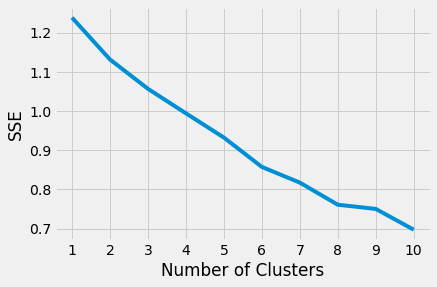

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [49]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

6

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(santiago10_grouped_clustering)
    score = silhouette_score(santiago10_grouped_clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

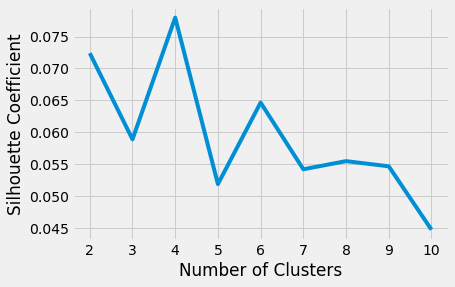

In [52]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [53]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(santiago10_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 0, 0, 3, 3, 3, 3, 0, 2])

In [54]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Apoquindo,Bakery,Sandwich Place,Pool,Sushi Restaurant,Restaurant,Coffee Shop,Sporting Goods Shop,Café,Chinese Restaurant,Molecular Gastronomy Restaurant
1,Barrio Balmaceda,Peruvian Restaurant,Mobile Phone Shop,Grocery Store,South American Restaurant,Skate Park,Seafood Restaurant,Farmers Market,Martial Arts School,Chinese Restaurant,Soccer Field
2,Barrio Bellavista,Bar,Nightclub,Restaurant,Theater,Hotel,Hostel,Sandwich Place,South American Restaurant,Athletics & Sports,Latin American Restaurant
3,Barrio Concha y Toro,Bar,Hotel,Arepa Restaurant,Pub,Yoga Studio,Restaurant,Martial Arts School,Medical Center,Café,Seafood Restaurant
4,Barrio Cívico,Coffee Shop,Café,Restaurant,Bookstore,Sandwich Place,Plaza,Bakery,Theater,Gym,Candy Store


In [55]:
#neighborhoods_venues_sorted.drop('Cluster Labels',axis=  'columns', inplace= True)

In [56]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

santiago10_merged = dataSantiago10[:]

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
santiago10_merged = santiago10_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighborhood')

santiago10_merged.head() # check the last columns!

,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Concha y Toro,-33.445770,-70.665985,0,Bar,Hotel,Arepa Restaurant,Pub,Yoga Studio,Restaurant,Martial Arts School,Medical Center,Café,Seafood Restaurant
1,Barrio Las Flores SA,-33.406139,-70.577347,3,Clothing Store,Cosmetics Shop,Park,Men's Store,Tea Room,Vegetarian / Vegan Restaurant,Market,Sporting Goods Shop,Bistro,Chocolate Shop
2,Barrio el Golf,-33.413998,-70.592178,3,Coffee Shop,Restaurant,Sandwich Place,Bakery,Cosmetics Shop,Café,Pharmacy,Plaza,Salad Place,South American Restaurant
3,Barrio Pedro de Valdivia Norte,-33.418152,-70.616013,3,Coffee Shop,Shoe Store,Park,Athletics & Sports,South American Restaurant,Buffet,Café,French Restaurant,Sculpture Garden,Sporting Goods Shop
4,Barrio Londres,-33.444637,-70.648224,3,Coffee Shop,Sandwich Place,Bookstore,Pizza Place,Restaurant,Café,Chinese Restaurant,Theater,Plaza,Gym


In [57]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(santiago10_merged['latitude'], santiago10_merged['longitude'], santiago10_merged['neighborhood'], santiago10_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [59]:
santiago10_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Barrio Apoquindo,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,...,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Barrio Balmaceda,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Barrio Bellavista,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.010417,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.010417,0.0
3,Barrio Concha y Toro,0.032258,0.0,0.0,0.0,0.0,0.064516,0.0,0.00,0.000000,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Barrio Cívico,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.000000,...,0.00,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [70]:
santiago10_merged.head(1)

,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Concha y Toro,-33.44577,-70.665985,0,Bar,Hotel,Arepa Restaurant,Pub,Yoga Studio,Restaurant,Martial Arts School,Medical Center,Café,Seafood Restaurant


In [71]:
santiago10_grouped.head(1)

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Barrio Apoquindo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
santiago10_merged_copy['1st Most Common Venue P'] = 0
santiago10_merged_copy['2nd Most Common Venue P'] = 0
santiago10_merged_copy['3rd Most Common Venue P'] = 0
santiago10_merged_copy['4th Most Common Venue P'] = 0
santiago10_merged_copy['5th Most Common Venue P'] = 0
santiago10_merged_copy['6th Most Common Venue P'] = 0
santiago10_merged_copy['7th Most Common Venue P'] = 0
santiago10_merged_copy['8th Most Common Venue P'] = 0
santiago10_merged_copy['9th Most Common Venue P'] = 0
santiago10_merged_copy['10th Most Common Venue P'] = 0

<ipython-input-92-5719da79adee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santiago10_merged_copy['1st Most Common Venue P'] = 0
<ipython-input-92-5719da79adee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santiago10_merged_copy['2nd Most Common Venue P'] = 0
<ipython-input-92-5719da79adee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [91]:
santiago10_merged_copy.head()

,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Concha y Toro,-33.445770,-70.665985,0,Bar,Hotel,Arepa Restaurant,Pub,Yoga Studio,Restaurant,Martial Arts School,Medical Center,Café,Seafood Restaurant
1,Barrio Las Flores SA,-33.406139,-70.577347,3,Clothing Store,Cosmetics Shop,Park,Men's Store,Tea Room,Vegetarian / Vegan Restaurant,Market,Sporting Goods Shop,Bistro,Chocolate Shop
2,Barrio el Golf,-33.413998,-70.592178,3,Coffee Shop,Restaurant,Sandwich Place,Bakery,Cosmetics Shop,Café,Pharmacy,Plaza,Salad Place,South American Restaurant
3,Barrio Pedro de Valdivia Norte,-33.418152,-70.616013,3,Coffee Shop,Shoe Store,Park,Athletics & Sports,South American Restaurant,Buffet,Café,French Restaurant,Sculpture Garden,Sporting Goods Shop
4,Barrio Londres,-33.444637,-70.648224,3,Coffee Shop,Sandwich Place,Bookstore,Pizza Place,Restaurant,Café,Chinese Restaurant,Theater,Plaza,Gym


In [125]:
santiago10_merged_copy.loc[0,'1st Most Common Venue P'] = 1
#santiago10_merged_copy.loc[0,'neighborhood']


C:\Users\cacoh\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [104]:
barrio = santiago10_merged_copy.loc[0,'neighborhood']
venue = santiago10_merged_copy.loc[0,'1st Most Common Venue']

santiago10_grouped[santiago10_grouped.Neighborhood == barrio][venue]



3    0.16129
Name: Bar, dtype: float64

In [109]:
dictProb = {'1st Most Common Venue' : '1st Most Common Venue P',
           '2nd Most Common Venue' : '2nd Most Common Venue P',
           '3rd Most Common Venue' : '3rd Most Common Venue P',
            '4th Most Common Venue' : '4th Most Common Venue P',
            '5th Most Common Venue' : '5th Most Common Venue P',
            '6th Most Common Venue' : '6th Most Common Venue P',
            '7th Most Common Venue' : '7th Most Common Venue P',
            '8th Most Common Venue' : '8th Most Common Venue P',
            '9th Most Common Venue' : '9th Most Common Venue P',
            '10th Most Common Venue' : '10th Most Common Venue P',
           }

In [115]:
for key, value in dictProb.items():
    print(key)
    print(value)

1st Most Common Venue
1st Most Common Venue P
2nd Most Common Venue
2nd Most Common Venue P
3rd Most Common Venue
3rd Most Common Venue P
4th Most Common Venue
4th Most Common Venue P
5th Most Common Venue
5th Most Common Venue P
6th Most Common Venue
6th Most Common Venue P
7th Most Common Venue
7th Most Common Venue P
8th Most Common Venue
8th Most Common Venue P
9th Most Common Venue
9th Most Common Venue P
10th Most Common Venue
10th Most Common Venue P


In [159]:
santiago10_merged_copy.loc[0,'1st Most Common Venue P'] = pd.to_numeric(santiago10_grouped[santiago10_grouped.Neighborhood == barrio][venue])

ValueError: Incompatible indexer with Series

In [171]:
type(p[0])

pandas.core.series.Series

In [178]:
p= []
for row in range(len(santiago10_merged_copy)):
    barrio = santiago10_merged_copy.loc[row,'neighborhood']   
    venue = santiago10_merged_copy.loc[row,'1st Most Common Venue']
    p.append(santiago10_grouped[santiago10_grouped.Neighborhood == barrio][venue])
    #santiago10_merged_copy.loc[row,'1st Most Common Venue P'] = p
    print(barrio + ', ' + venue)

Barrio Concha y Toro, Bar
Barrio Las Flores SA, Clothing Store
Barrio el Golf, Coffee Shop
Barrio Pedro de Valdivia Norte, Coffee Shop
Barrio Londres, Coffee Shop
Barrio Lastarria, Coffee Shop
Barrio San Borja, Coffee Shop
Barrio San Isidro, Sushi Restaurant
Barrio Cívico, Coffee Shop
Barrio Franklin, Sandwich Place
Barrio Vaticano, Spa
Barrio La Capitanía, Spa
Barrio Escandinavia, Pizza Place
Barrio Tajamar, Café
Barrio Lyon, Hotel
Barrio Divina Providencia, Restaurant
Barrio Los Domínicos, Pharmacy
Barrio Madrid, Chinese Restaurant
Barrio Patronato, Korean Restaurant
Barrio Balmaceda, Peruvian Restaurant
Barrio San Bernardo, Pharmacy
Barrio Elías de la Cruz, Japanese Restaurant
Barrio República, Chinese Restaurant
Barrio Meiggs, Shopping Mall
Barrio El Bosque, Coffee Shop
Barrio Suecia, Clothing Store
Barrio Manuel Montt, Peruvian Restaurant
Barrio Italia, Bar
Barrio Bellavista, Bar
Barrio Apoquindo, Bakery
Barrio San Diego, Fried Chicken Joint
Barrio París, Coffee Shop
Barrio Yungay

In [187]:
p[0]

3    0.16129
Name: Bar, dtype: float64

In [176]:
santiago10_merged_copy.loc['1st Most Common Venue P'] = p

a

ValueError: cannot set a row with mismatched columns

In [121]:
for row in range(len(santiago10_merged_copy)):
    print(row)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [60]:
#santiago10_merged.head()
#santiago10_grouped.head()

column = santiago10_merged['1st Most Common Venue'][0]
row = santiago10_merged['neighborhood'][0]

In [61]:
santiago10_grouped[santiago10_grouped.Neighborhood == row][column]

3    0.16129
Name: Bar, dtype: float64

In [90]:
santiago10_merged_copy = santiago10_merged[:]

In [63]:
santiago10_merged_copy[santiago10_merged_copy.neighborhood == row]['1st Most Common Venue'] = '[[1,1]]'

<ipython-input-63-e8fa6a1087e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santiago10_merged_copy[santiago10_merged_copy.neighborhood == row]['1st Most Common Venue'] = '[[1,1]]'


In [64]:
santiago10_merged_copy[santiago10_merged_copy.neighborhood == row]['1st Most Common Venue']

0    Bar
Name: 1st Most Common Venue, dtype: object

In [65]:
#rojo
santiago10_merged.loc[santiago10_merged['Cluster Labels'] == 0, santiago10_merged.columns[[0] + list(range(4, santiago10_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Concha y Toro,Bar,Hotel,Arepa Restaurant,Pub,Yoga Studio,Restaurant,Martial Arts School,Medical Center,Café,Seafood Restaurant
7,Barrio San Isidro,Sushi Restaurant,Pizza Place,Latin American Restaurant,Fried Chicken Joint,Restaurant,Peruvian Restaurant,Playground,Plaza,Nightclub,Coffee Shop
10,Barrio Vaticano,Spa,Park,Bakery,Gym,Deli / Bodega,Asian Restaurant,Farmers Market,Medical Center,Chinese Restaurant,Coffee Shop
12,Barrio Escandinavia,Pizza Place,Sushi Restaurant,Art Gallery,Spanish Restaurant,Liquor Store,Sandwich Place,Coffee Shop,Bar,Bakery,BBQ Joint
19,Barrio Balmaceda,Peruvian Restaurant,Mobile Phone Shop,Grocery Store,South American Restaurant,Skate Park,Seafood Restaurant,Farmers Market,Martial Arts School,Chinese Restaurant,Soccer Field
22,Barrio República,Chinese Restaurant,Pizza Place,Pub,Hot Dog Joint,Taco Place,Martial Arts School,Gastropub,Lounge,Breakfast Spot,Sushi Restaurant
26,Barrio Manuel Montt,Peruvian Restaurant,Coffee Shop,Pizza Place,Chinese Restaurant,Latin American Restaurant,Park,Pool,Hot Dog Joint,Playground,Rental Car Location
27,Barrio Italia,Bar,Pizza Place,Bakery,Coffee Shop,Café,Hotel,Sushi Restaurant,Ice Cream Shop,Peruvian Restaurant,Italian Restaurant
28,Barrio Bellavista,Bar,Nightclub,Restaurant,Theater,Hotel,Hostel,Sandwich Place,South American Restaurant,Athletics & Sports,Latin American Restaurant
32,Barrio Yungay,Bar,Museum,Historic Site,Peruvian Restaurant,Restaurant,Japanese Restaurant,Flea Market,Food Truck,French Restaurant,Event Space


In [66]:
#morado
santiago10_merged.loc[santiago10_merged['Cluster Labels'] == 1, santiago10_merged.columns[[0] + list(range(4, santiago10_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Barrio San Diego,Fried Chicken Joint,Automotive Shop,Print Shop,Diner,Dive Bar,Restaurant,Rock Club,Flea Market,Food & Drink Shop,Café


In [67]:
#cian
santiago10_merged.loc[santiago10_merged['Cluster Labels'] == 2, santiago10_merged.columns[[0] + list(range(4, santiago10_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Barrio Franklin,Sandwich Place,Thai Restaurant,Flea Market,Peruvian Restaurant,Mexican Restaurant,Seafood Restaurant,Restaurant,Falafel Restaurant,South American Restaurant,Latin American Restaurant
16,Barrio Los Domínicos,Pharmacy,Restaurant,Liquor Store,Bakery,Grocery Store,Latin American Restaurant,Shopping Mall,Sports Bar,Plaza,Convenience Store
17,Barrio Madrid,Chinese Restaurant,Sandwich Place,Sushi Restaurant,Japanese Restaurant,Bakery,Pizza Place,Peruvian Restaurant,Farmers Market,Nightclub,Fast Food Restaurant
20,Barrio San Bernardo,Pharmacy,Pizza Place,Sushi Restaurant,Chinese Restaurant,Sandwich Place,Seafood Restaurant,Fast Food Restaurant,Plaza,Pet Store,Peruvian Restaurant
23,Barrio Meiggs,Shopping Mall,Sandwich Place,Pharmacy,Fried Chicken Joint,Restaurant,Fast Food Restaurant,Café,Business Service,Asian Restaurant,Chinese Restaurant
29,Barrio Apoquindo,Bakery,Sandwich Place,Pool,Sushi Restaurant,Restaurant,Coffee Shop,Sporting Goods Shop,Café,Chinese Restaurant,Molecular Gastronomy Restaurant
33,Barrio Estacion,Sandwich Place,Pharmacy,Burger Joint,Fast Food Restaurant,Restaurant,Shopping Mall,Chinese Restaurant,Fried Chicken Joint,Business Service,Flea Market


In [68]:
#verde
santiago10_merged.loc[santiago10_merged['Cluster Labels'] == 3, santiago10_merged.columns[[0] + list(range(4, santiago10_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barrio Las Flores SA,Clothing Store,Cosmetics Shop,Park,Men's Store,Tea Room,Vegetarian / Vegan Restaurant,Market,Sporting Goods Shop,Bistro,Chocolate Shop
2,Barrio el Golf,Coffee Shop,Restaurant,Sandwich Place,Bakery,Cosmetics Shop,Café,Pharmacy,Plaza,Salad Place,South American Restaurant
3,Barrio Pedro de Valdivia Norte,Coffee Shop,Shoe Store,Park,Athletics & Sports,South American Restaurant,Buffet,Café,French Restaurant,Sculpture Garden,Sporting Goods Shop
4,Barrio Londres,Coffee Shop,Sandwich Place,Bookstore,Pizza Place,Restaurant,Café,Chinese Restaurant,Theater,Plaza,Gym
5,Barrio Lastarria,Coffee Shop,Art Museum,Art Gallery,Bookstore,Park,Hotel,Burger Joint,Gift Shop,Fountain,Hostel
6,Barrio San Borja,Coffee Shop,Hotel,Gift Shop,Art Gallery,Fountain,Park,Pedestrian Plaza,Scenic Lookout,Sandwich Place,Salon / Barbershop
8,Barrio Cívico,Coffee Shop,Café,Restaurant,Bookstore,Sandwich Place,Plaza,Bakery,Theater,Gym,Candy Store
11,Barrio La Capitanía,Spa,Café,Bakery,Hotel,Sushi Restaurant,Deli / Bodega,Pharmacy,Park,Coffee Shop,Caribbean Restaurant
13,Barrio Tajamar,Café,Restaurant,Hotel,Coffee Shop,Pizza Place,Sandwich Place,Seafood Restaurant,Gastropub,Burger Joint,Yoga Studio
14,Barrio Lyon,Hotel,Restaurant,Café,Bakery,Yoga Studio,Grocery Store,Recording Studio,Electronics Store,Clothing Store,Music Venue


# Results

# Discussion

# Conclusion